<a href="https://colab.research.google.com/github/thor4/neuralnets/blob/master/state_farm_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State Farm Pre-employment Assessment
### *Model-based supervised learning binary classification task*
Your work will be evaluated in the following areas:
- The appropriateness of the steps you took
- The complexity of your models
- The performance of each model on the test set (using AUC)
- The organization and readability of your code
- The write-up comparing the models
---

## Step 1 - Clean and prepare your data
The data in this exercise have been simulated to mimic real, dirty data. Please clean the data with whatever method(s) you believe to be best/most suitable. Success in this exercise typically involves feature engineering and avoiding data leakage. You may create new features. However, you may not add or supplement with external data. 

We will begin by importing relevant libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, we use the pandas library to load our CSV data.

In [2]:
train_data = pd.read_csv("exercise_40_train.csv")
test_data = pd.read_csv("exercise_40_test.csv")

In [37]:
train_data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  object 
 3   x4      10000 non-null  float64
 4   x5      9398 non-null   float64
 5   x6      10000 non-null  float64
 6   x7      10000 non-null  object 
 7   x8      10000 non-null  float64
 8   x9      10000 non-null  float64
 9   x10     10000 non-null  float64
 10  x11     8671 non-null   float64
 11  x12     10000 non-null  float64
 12  x13     10000 non-null  float64
 13  x14     7572 non-null   float64
 14  x15     10000 non-null  float64
 15  x16     7247 non-null   float64
 16  x17     10000 non-null  float64
 17  x18     10000 non-null  float64
 18  x19     10000 non-null  object 
 19  x20     10000 non-null  float64
 20  x21     10000 non-null  float64
 21  x22     9387 non-null   float64
 22

There are 40,000 examples in the training set and 10,000 in the test set. The first column in the training set is the label with a header of `y`. The remaining 100 columns are features with a header of `x` followed by the feature number (i.e.: feature 10 column is labeled `x10`). There are 12 object dtype columns, 2 int64, and 86 float64.

In [ ]:
train_data.select_dtypes(include=['int64'])

,y,x59,x98
0,0,0,0
1,1,0,1
2,1,0,0
3,0,0,1
4,0,0,0
...,...,...,...
39995,0,0,1
39996,0,0,0
39997,0,0,1
39998,0,0,0


In [ ]:
train_data.select_dtypes(include=['object'])

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Sun,-0.0085%,$3750.51991954505,female,no,NaN,5-10 miles,July,farmers,NaN,no,yes
39996,Thursday,0.0077%,$448.867118077561,male,yes,Illinois,5-10 miles,July,progressive,ford,no,yes
39997,Monday,-0.0216%,$834.95775080472,male,yes,NaN,5-10 miles,August,geico,ford,no,yes
39998,Tuesday,1e-04%,$-48.1031003332715,male,no,Ohio,5-10 miles,December,farmers,NaN,no,yes


The int64 `[x59, x98]` comprise two feature columns and one label column of [0,1] and the 12 object dtypes `[x3, x7, x19, x24, x31, x33, x39, x60, x65, x77, x93, x99]` contain dates, percentages, currency, sex, yes/no, states, distance in miles, month, insurance carrier, vehicle make, and two more yes/no columns. The rest of the columns contain float64 numbers or NaN.

In [ ]:
train_data.columns[train_data.isnull().sum() != 0]

Index(['x5', 'x11', 'x14', 'x16', 'x22', 'x24', 'x26', 'x30', 'x33', 'x38',
       'x41', 'x42', 'x44', 'x45', 'x49', 'x52', 'x54', 'x55', 'x57', 'x61',
       'x63', 'x64', 'x67', 'x68', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79',
       'x80', 'x83', 'x85', 'x86', 'x88', 'x89', 'x91', 'x92', 'x94', 'x95',
       'x96', 'x99'],
      dtype='object')

These are all the columns that have null values which will need to be addressed during feature engineering. The following are object dtype columns with null values: `[x24, x33, x77, x99]` corrresponding to [male/female, state, vehicle make, yes/no] while the rest are float64 dtype with null values.

Let's count the category column contents `[x3, x24, x31, x33, x39, x60, x65, x77, x93, x99]`

In [ ]:
columns = ['x3', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99']
for col in columns:
    print(train_data[col].value_counts())

Wednesday    4930
Monday       4144
Friday       3975
Tuesday      3915
Sunday       3610
Saturday     3596
Tue          2948
Thursday     2791
Mon          2200
Wed          2043
Sat          1787
Thur         1643
Fri          1620
Sun           798
Name: x3, dtype: int64
female    18158
male      17986
Name: x24, dtype: int64
no     34022
yes     5978
Name: x31, dtype: int64
California        3393
Texas             2252
Florida           1802
New York          1714
Illinois          1240
Pennsylvania      1233
Ohio              1114
Michigan           982
Georgia            918
North Carolina     910
New Jersey         870
Virginia           791
Washington         750
Tennessee          690
Indiana            674
Arizona            665
Massachusetts      638
Wisconsin          635
Missouri           634
Minnesota          611
Maryland           581
Alabama            554
Colorado           530
Louisiana          501
South Carolina     491
Kentucky           478
Oregon             45

In [36]:
columns = ['x3', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99']
for col in columns:
    print(f"{col}: {train_data[col].isnull().sum()}")

x3: 0
x24: 3856
x31: 0
x33: 7171
x39: 0
x60: 0
x65: 0
x77: 9257
x93: 0
x99: 12836


- We will need to combine duplicate days in `x3` such as Wednesday and Wed during our feature engineering.
- `x24` has male/female with null values
- `x31` is imbalanced with only 15% yes and 85% no.
- `x33` has states with null values
- `x39` has only one value and can safely be dropped.
- `x77` has car makes with null values
- `x93` is also imbalanced with only 11% yes and 89% no.
- `x99` has only one value, other than NaN and can safely be dropped.

In [ ]:
train_data.describe()

,y,x1,x2,x4,x5,x6,x8,x9,x10,x11,...,x89,x90,x91,x92,x94,x95,x96,x97,x98,x100
count,40000.000000,40000.000000,40000.000000,40000.000000,37572.000000,40000.000000,40000.000000,40000.000000,40000.000000,34890.000000,...,29309.000000,40000.000000,34741.000000,37565.000000,37660.000000,27396.000000,33362.000000,40000.000000,40000.000000,40000.000000
mean,0.145075,2.999958,20.004865,0.002950,0.005396,0.007234,0.004371,2.722334,0.490339,100.008988,...,10.767838,3.000166,0.001636,4.002896,3.969385,0.031886,10.525530,10.002814,0.497650,100.024743
std,0.352181,1.994490,1.604291,1.462185,1.297952,1.358551,1.447223,1.966828,1.029863,13.343010,...,3.732763,1.164411,1.468790,3.017420,1.473939,1.823091,1.437581,1.986984,0.500001,5.247514
min,0.000000,-3.648431,13.714945,-5.137161,-5.616412,-6.113153,-6.376810,-3.143438,-3.538129,50.526543,...,6.106024,-2.173310,-6.328126,-3.384399,-1.663063,-6.885150,8.210456,1.911272,0.000000,78.340735
25%,0.000000,1.592714,18.921388,-1.026798,-0.872354,-0.909831,-0.971167,1.340450,-0.207833,91.056682,...,7.927605,2.211125,-0.982679,1.610899,2.943758,-1.190682,9.397548,8.665103,0.000000,96.516856
50%,0.000000,2.875892,20.005944,0.002263,0.008822,0.007335,0.002226,2.498876,0.486926,100.020965,...,9.931831,2.998776,0.005664,4.099763,3.912526,0.001523,10.358355,9.994318,0.000000,100.024977
75%,0.000000,4.270295,21.083465,1.043354,0.892467,0.926222,0.985023,3.827712,1.182994,109.025025,...,12.710543,3.786751,0.989632,6.113157,4.930563,1.248742,11.448559,11.342574,1.000000,103.558762
max,1.000000,13.837591,27.086468,5.150153,5.698128,5.639372,5.869889,18.006669,4.724186,148.784484,...,38.566041,7.130058,6.868747,16.734658,11.669024,7.631773,18.725468,17.861580,1.000000,122.406809


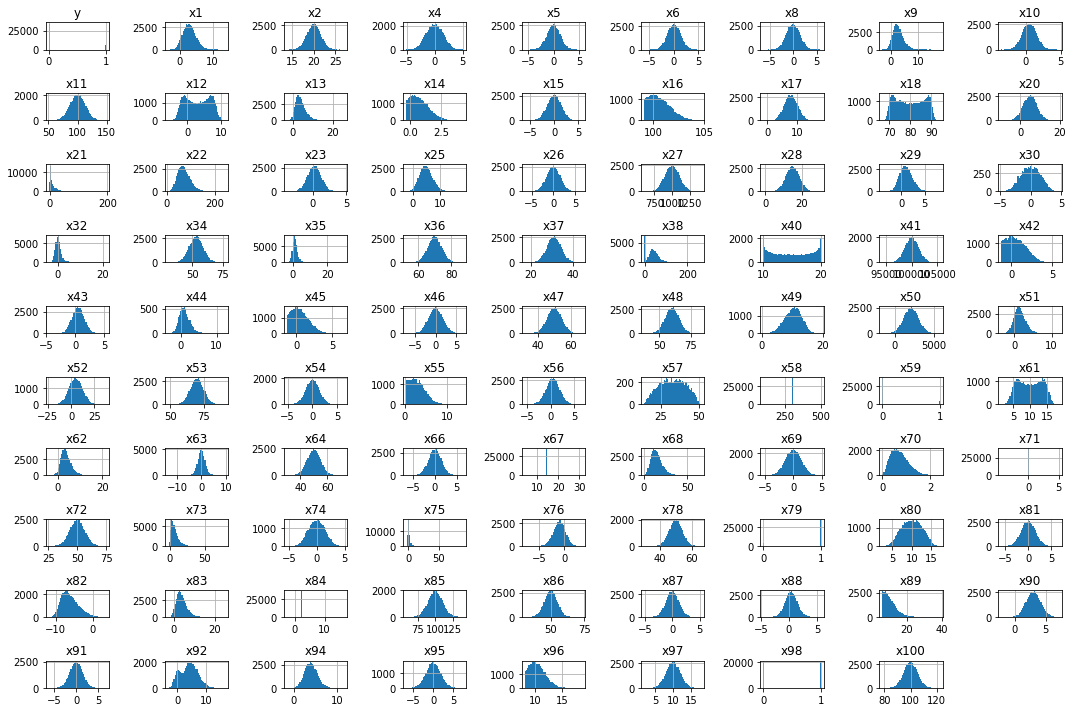

In [ ]:
train_data.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

- `x1`, `x9`, `x13`, `x17`, `x20`, `x22`, `x25`, `x28`, `x29`, `x34`, `x36`, `x37`, `x38`, `x47`, `x48`, `x49`, `x50`, `x51`, `x52`, `x53`, `x62`, `x64`, `x68`, `x72`, `x76`, `x78`, `x80`, `x83`, `x85`, `x86`, `x90`, `x94`, `x97`, `x100` appear Gaussian and just need a shift for zero mean
- `x12`, `x18`, `x61`, `x92` look like a bimodal distribution
- `x14`, `x16`, `x21`, `x42`, `x45`, `x55`, `x70`, `x73`, `x75`, `x82`, `x89`, `x96` are positively skewed
- `x40` looks uniform and like it was cut off at minimum and maximum bounds of 10 & 20, respectively
- `x57` looks like a semicircle distribution
- `x58`, `x59`, `x67`, `x71`, `x79`, `x84`, `x98` need closer inspection to determine appropriate action

In [32]:
corr_matrix = train_data.corr()

In [ ]:
corr_matrix["y"].sort_values(ascending=False)

y      1.000000
x68    0.080861
x52    0.075891
x70    0.057341
x28    0.051842
         ...   
x78   -0.073403
x16   -0.076702
x57   -0.084861
x40   -0.109574
x47   -0.123445
Name: y, Length: 89, dtype: float64

No features are strongly correlated, positively or negatively, with the label.

In [ ]:
relevant_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
relevant_corr = relevant_corr.stack().reset_index()
relevant_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
relevant_corr = relevant_corr[(relevant_corr['Correlation'] > 0.6) | (relevant_corr['Correlation'] < -0.6)]
print(relevant_corr)

     Variable 1 Variable 2  Correlation
1295        x18        x28    -0.605050
1301        x18        x36     0.655774
1324        x18        x61     0.622350
1355        x18        x95    -0.612258
1841        x28        x36    -0.755564
1851        x28        x47    -0.741358
2227        x36        x61     0.686496
2403        x40        x70    -0.622553
3027        x53        x70    -0.651215


However, there are nine column combinations with strong correlation greater than 0.6, either positive or negative.

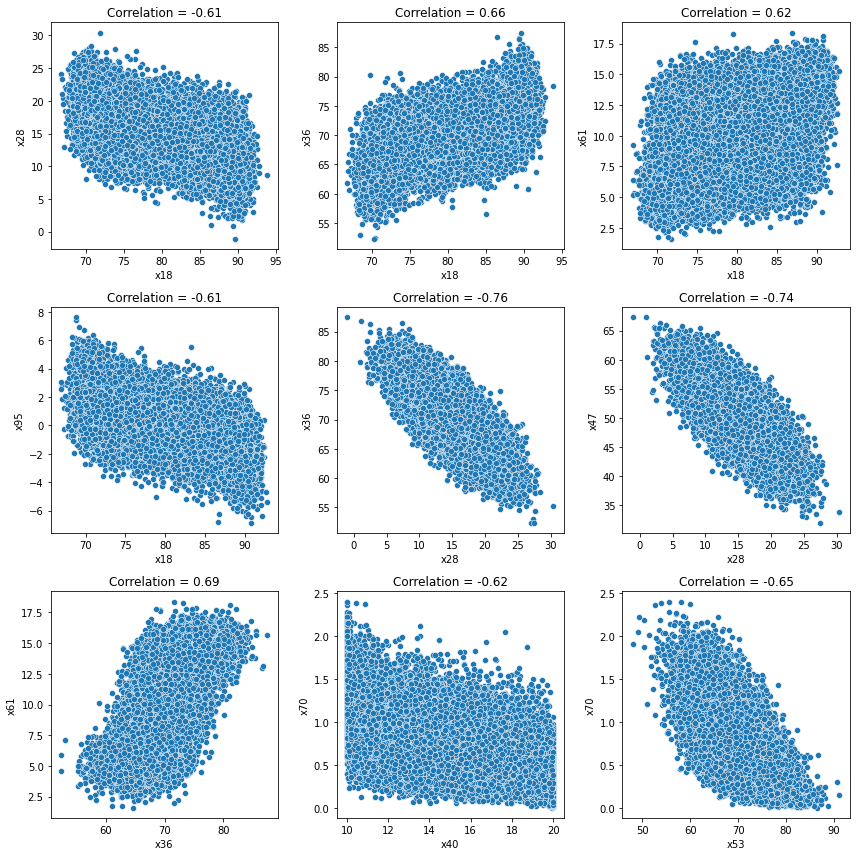

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    var1 = relevant_corr.iloc[i]['Variable 1']
    var2 = relevant_corr.iloc[i]['Variable 2']
    corr = relevant_corr.iloc[i]['Correlation']
    sns.scatterplot(x=train_data[var1], y=train_data[var2], ax=ax)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_title(f'Correlation = {corr:.2f}')

plt.tight_layout()
plt.show()

These column pairs are candidates for combination when we do feature engineering. Again, we see the apparent cut-off in column x40 of 10 at the minimum and 20 at the maximum. This has implications for the training set as it will train a model that will expect this constraint from data processed in production.

### Prepare the data
---

First, separate the predictors from the labels

In [3]:
train = train_data.drop("y", axis=1)
train_labels = train_data["y"].copy()

<AxesSubplot:>

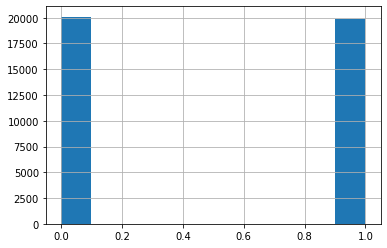

In [27]:
train['x98'].hist()

<AxesSubplot:>

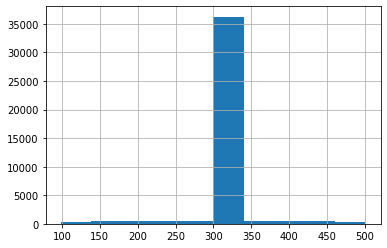

In [29]:
train['x58'].hist()

Features like x98 are [0,1] and features like x58 can be categorically encoded.

In [31]:
print(train['x59'].value_counts())
print(train['x79'].value_counts())
print(train['x98'].value_counts())

0    36014
1     3986
Name: x59, dtype: int64
1.0    33785
0.0     3785
Name: x79, dtype: int64
0    20094
1    19906
Name: x98, dtype: int64


- `x59` is imbalanced with 10% 1 and 90% 0 and no null values.
- `x79` is imbalanced with 10% 0 and 90% 1. It also has null values and may need to be dropped entirely.
- `x98` is pretty evenly balanced with no null values.

In [33]:
corr_matrix["y"]["x79"]

-0.00217160054581461

`x79` has such a low, basically nonexistent, correlation, we will drop it entirely.

In [38]:
print(train['x24'].value_counts())
print(train['x31'].value_counts())
print(train['x93'].value_counts())

female    18158
male      17986
Name: x24, dtype: int64
no     34022
yes     5978
Name: x31, dtype: int64
no     35506
yes     4494
Name: x93, dtype: int64


In [42]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, PowerTransformer

# Drop unneeded columns
drop_columns = ['x39', 'x99', 'x79', 'x28']

# Impute median for float64 columns
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(method='yeo-johnson')
)

# Categorical columns transformation
cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

preprocessing = make_column_transformer(
    ('drop', drop_columns),
    (num_pipeline, make_column_selector(dtype_include='float64')),
    # (cat_pipeline, make_column_selector(dtype_include='object'))
)


In [43]:
train_prepared = preprocessing.fit_transform(train)

In [45]:
train_prepared.shape

(40000, 86)

### Feature Engineering To-Do List
- `x39` has only one value and can safely be dropped.
- `x99` has only one value, other than NaN and can safely be dropped.
- `x79` has such a low, basically nonexistent, correlation, null values and is [0,1]. we will drop it entirely.
- `x28` had high negative correlation >-.75 with `x36` and `x47` and will be dropped.
- `x24`, `x31` and `x93` of dtype object should be transformed to int64 with 0's and 1's instead of their current binary categorical values
- `x33` of dtype object has states within the US with null values. it should have its null values replaced with the most likely based on probabilities. next, it should be transformed using one-hot encoding.
- `x77` of dtype object has car makes with null values. it should also have its null values replaced with the most likely based on probabilities. next, it should be transformed using one-hot encoding.
- `x3` of dtype object has days of the week with duplicate days to combine such as Wednesday and Wed. after combining duplicate days, it should be transformed using one-hot encoding.
- `x60` of dtype object are the months of the year. it should be transformed using one-hot encoding.
- `x65` of dtype object are names of insurance carriers. it should be transformed using one-hot encoding.
- `x58`, `x67`, `x71`, `x84` float64 have a high concentration of values within a narrow range. each should be transformed into three categories: middle range that includes the high concentration, low range is anything below that, and high range anything above that. the resultant categories should be transformed using one-hot encoding.
- `x12`, `x18`, `x61`, `x92` have a bimodal distribution and require a quantile transform (QuantileTransformer) with normal output. 
- `x14`, `x16`, `x21`, `x42`, `x45`, `x55`, `x70`, `x73`, `x75`, `x82`, `x89`, `x96` are positively skewed and require a PowerTransformer with Yeo-Johnson method.
- `x40` looks uniform and like it was cut off at minimum and maximum bounds of 10 & 20, respectively. it requires a PowerTransformer with Yeo-Johnson method.
- `x57` looks like a semicircle distribution and requires a PowerTransformer with Yeo-Johnson method.
- all float64 columns should have their null values replaced with median values using imputer after dropping unneeded feature columns identified earlier. they should also all be standardized afterwards using a PowerTransformer with Yeo-Johnson method, except for those with a bimodal distribution.

### Model Takeaways
- There appears to be a constraint in column x40 of 10 at the minimum and 20 at the maximum. This has implications for the training set as it will train a model that will expect this constraint from data processed in production.